<h1 align='center'>Udacity Nanodegree Project 1</h1>
<h2 align='center'><i><font color='blue'>NYC Subway Ridership and Weather Analysis</font></i></h2>
<h3 align='center'>By: Taylor Somma</h3>
<p> This is a project analyzing data obtained from the NYC subway system and provided by Udacity. The objective of this analyis is to determine what facets of the weather, time of day, and day of week most influence the number of people that ride the subway in NYC. After determining the variables with the strongest correlation we will produce a predictive model using linear regression with gradient descent to best predict the number of subway riders.</p>
</p><b>Sources</b><br>
<a href='http://www.udacity.com'>Udacity</a><br>
<a href='http://pandas.pydata.org/pandas-docs/stable/index.html'>Pandas Documentation</a><br>
<a href='http://abacus.bates.edu/~ganderso/biology/resources/stats_flow_chart_v2014.pdf'>Statistical Test Flowchart</a><br>
<a href='http://www.csse.monash.edu.au/~smarkham/resources/param.htm'>Parametric vs non-parametric data</a><br>
<a href='https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test'>Mann-Whitney U</a>
</p>
<p><a href='http://www.magicfilebox.com'>Back to magicfilebox.com</a>

<h2>Section 1. Statistical Test</h2>

<p><font color=tomato>1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?</font></p>
I used a two tail p-value because we are testing if there is a difference in means between the datasets without a presumption of which mean is larger.</p>
<p>Assuming a null hypothesis that there is no meaningful difference between the mean number of riders on rainy and non rainy days. I chose to use a p-critical value of 0.01.</p>

<p><font color=tomato>1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.</font></p>
<p>A Mann-Whitney test was chosen because the sample sizes of rainy and non-rainy days are different and the frequency distribution shown in <a href='http://localhost:8888/notebooks/Desktop/nanoDegree/project_1.ipynb#Figure-1Histogram-of-ENTRIESn_hourly-when-raining-vs-not-raining'>figure 1</a> is not normally distributed.</p>

<p><font color=tomato>1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.</font></p>
<p>As seen <a href='http://localhost:8888/notebooks/Desktop/nanoDegree/project_1.ipynb#Mann-Whitney-U-Test-Results'>here</a> the p value of the Mann-Whitney U test is 2.74e-06 which is much less than 0.05. Since this output gives us a one-tailed result we simply need to double it to get the two-tailed p-value of 5.482e-06. The mean number of hourly riders for rainy and non rainy days are 2028 and 1845 respectively.</p>

<p><font color=tomato>1.4 What is the significance and interpretation of these results?</font></p>
<p>Since the p-value is far less than the p-critical value we can safely reject the null hypothesis of any difference in means of ENTRIESn_hourly during rainy and non rainy days being due to chance. Given the p-value and the mean number of ENTRIESn_hourly during rainy days being more than not rainy days we can make the claim that more people ride the subway during rainy days than days with no rain. We can not make any claims of why this is yet but one guess is that people who would have otherwise walked to where they needed to go instead chose to take the subway.</p>

<h2>Section 2. Linear Regression</h2>

<p><font color=tomato>2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:
OLS using Statsmodels or Scikit Learn
Gradient descent using Scikit Learn
Or something different?</font></p>
<p>Answer 1</p>

<p><font color=tomato>2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?</font></p>
<p>Answer 2</p>

<p><font color=tomato>2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that
the selected features will contribute to the predictive power of your model.
Your reasons might be based on intuition. For example, response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.”
Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my R2 value.” </font></p>
<p>Answer 3</p>

<p><font color=tomato>2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?</font></p>
<p>Answer 4</p>

<p><font color=tomato>2.5 What is your model’s R2 (coefficients of determination) value?</font></p>
<p>Answer 5</p>

<p><font color=tomato>2.6 What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2  value?</font></p>
<p>Answer 6</p>

<h2 align='center'>Code Below</h2>

In [2]:
# Set notebook to display matplotlib plots in notebook
%matplotlib inline

In [3]:
#Set size of plots
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

In [4]:
#Import statements
import pandas as pd
import numpy as np
import scipy.stats
import sklearn
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from IPython.display import HTML, Javascript, display

In [5]:
# Load regular and improved datasets
improved_dataset = pd.read_csv('improved-dataset/turnstile_weather_v2.csv')
regular_dataset = pd.read_csv('turnstile_data_master_with_weather.csv')


In [6]:
#Seperate rainy and non-rainy days
rainyDays = improved_dataset[improved_dataset['rain']==1]
nonRainyDays = improved_dataset[improved_dataset['rain']==0]

<h3><font color=rgb(0,0,224)>Figure 1<br>Histogram of ENTRIESn_hourly when raining vs not raining</font></h3>

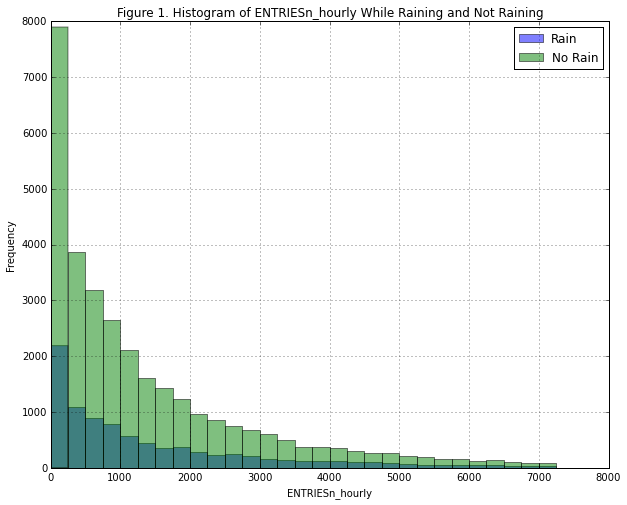

In [41]:
binLabels = []
for x in range(30):
    binLabels.append(x*250)
plt.figure()
plt.title('Figure 1. Histogram of ENTRIESn_hourly While Raining and Not Raining')
plt.xlabel('ENTRIESn_hourly')
plt.ylabel('Frequency')
rainyDays['ENTRIESn_hourly'].hist(bins=binLabels, alpha=0.5,label=['Raining'])
nonRainyDays['ENTRIESn_hourly'].hist(bins=binLabels,alpha=0.5,label=['No Rain'])
plt.legend(['Rain','No Rain'])

<h3>Mann-Whitney U Test Results</h3>

In [31]:
mannWhitneyOutput = scipy.stats.mannwhitneyu(rainyDays['ENTRIESn_hourly'],nonRainyDays['ENTRIESn_hourly'])
rainyDaysMean = rainyDays['ENTRIESn_hourly'].mean()
nonRainyDaysMean = nonRainyDays['ENTRIESn_hourly'].mean()
print mannWhitneyOutput
print 'U : ',mannWhitneyOutput[0]
print 'p one-tailed : ',mannWhitneyOutput[1]
print 'p two-tailed : ',mannWhitneyOutput[1]*2
print 'ENTRIESn_hourly Mean Rainy : ',rainyDaysMean
print 'ENTRIESn_hourly Mean Not Rainy : ',nonRainyDaysMean


(153635120.5, 2.7410695712437496e-06)
U :  153635120.5
p one-tailed :  2.74106957124e-06
p two-tailed :  5.48213914249e-06
ENTRIESn_hourly Mean Rainy :  2028.19603547
ENTRIESn_hourly Mean Not Rainy :  1845.53943866


<h3>Pivot Tables Defined</h3>
<h4>Also prints min,max,and mean temperatures and amount of precipitation</h4>
<p>pivot_1 creates <a href='http://localhost:8888/notebooks/Desktop/nanoDegree/project_1.ipynb#ENTRIESn_hourly-broken-down-by-day-of-week-and-hour'>table</a> to show mean ENTRIESn_hourly broken down by day of week and hour <br>
pivot_2 creates table grouping the dataset into mean ENTRIESn_hourly by meantempi<br>
pivot_3 creates table grouping the dataset into mean ENTRIESn_hourly by meanprecipi<br>
pivot_4 creates <a href='http://localhost:8888/notebooks/Desktop/nanoDegree/project_1.ipynb#Average-ENTRIESn_hourly-by-Day-of-Week-and-Rain-or-No-Rain'>table</a> to show mean ENTRIESn_hourly broken down by day of week and split into not rainy and rainy days</p>

In [9]:
# Build pivot tables for further analysis
improved_dataset['meantempi']=improved_dataset['meantempi'].round(decimals=0)
pivot_1 = pd.pivot_table(improved_dataset,columns='day_week',index='hour',aggfunc=np.mean)
pivot_2 = pd.pivot_table(improved_dataset,index='meantempi',aggfunc=np.mean)
pivot_3 = pd.pivot_table(improved_dataset,index='meanprecipi',aggfunc=np.mean)
pivot_4 = pd.pivot_table(improved_dataset,columns='rain',index='day_week',aggfunc=np.mean)

# Get locations of all stations
grouped_by_station = improved_dataset.groupby(['station'])
grouped_by_station_mean = grouped_by_station.aggregate(np.mean)
#Get locations of all units
grouped_by_unit = regular_dataset.groupby(['UNIT'])
grouped_by_unit_mean = grouped_by_station.aggregate(np.mean)
grouped_by_unit_sum = grouped_by_station.aggregate(np.sum)
print 'Min temp: ',improved_dataset['meantempi'].min()
print 'Mean temp: ',improved_dataset['meantempi'].mean()
print 'Max temp: ',improved_dataset['meantempi'].max()
print 'Min precip: ',improved_dataset['meanprecipi'].min()
print 'Mean precip: ',improved_dataset['meanprecipi'].mean()
print 'Max precip: ',improved_dataset['meanprecipi'].max()

Min temp:  49.0
Mean temp:  63.0922882131
Max temp:  80.0
Min precip:  0.0
Mean precip:  0.00461769326362
Max precip:  0.1575


In [10]:
#Finds center latitude and longitude for google maps api call
lat_max = grouped_by_station_mean['latitude'].max()
lat_min = grouped_by_station_mean['latitude'].min()
long_max = grouped_by_station_mean['longitude'].max()
long_min = grouped_by_station_mean['longitude'].min()
print 'Latitude Max, Min',lat_max,lat_min,'\nLongitude Max, Min ',long_max,long_min
print 'AVG: ',((lat_max+lat_min)/2),',',((long_max+long_min)/2)

lat_max_unit = grouped_by_unit_mean['latitude'].max()
lat_min_unit = grouped_by_unit_mean['latitude'].min()
long_max_unit = grouped_by_unit_mean['longitude'].max()
long_min_unit = grouped_by_unit_mean['longitude'].min()
print 'Latitude Max, Min',lat_max_unit,lat_min_unit,'\nLongitude Max, Min ',long_max_unit,long_min_unit
print 'AVG: ',((lat_max_unit+lat_min_unit)/2),',',((long_max_unit+long_min_unit)/2)

Latitude Max, Min 40.889185 40.576152 
Longitude Max, Min  -73.755383 -74.073622
AVG:  40.7326685 , -73.9145025
Latitude Max, Min 40.889185 40.576152 
Longitude Max, Min  -73.755383 -74.073622
AVG:  40.7326685 , -73.9145025


In [36]:
# Produce url for google maps api call
#Create google heat map lat,long objects in an array
#new google.maps.LatLng(37.782551, -122.445368),
#{location: new google.maps.LatLng(37.782, -122.447), weight: 0.5},
markerString = ''
latitudeArray = grouped_by_station_mean['latitude']
longitudeArray = grouped_by_station_mean['longitude']
meanEntries = grouped_by_station_mean['ENTRIESn_hourly']

lat_long_objects=''
lat_long_objects_weighted=''
for x in range(len(latitudeArray)):
    lat_long_objects+='new google.maps.LatLng('+str(latitudeArray[x])+','+str(longitudeArray[x])+'),'
    lat_long_objects_weighted+='{location: new google.maps.LatLng('+str(latitudeArray[x])+','+str(longitudeArray[x])+'), weight: '+str(meanEntries[x])+'},'
    if x%3==0:
        markerString += str(latitudeArray[x])+','+str(longitudeArray[x])+'|'
google_maps_marker_shell='https://maps.googleapis.com/maps/api/staticmap?size=800x800&maptype=roadmap&markers=color:blue%7C'
google_maps_callurl = google_maps_marker_shell+markerString[0:len(markerString)-1]
"""The below lines are commented out because they are the print statements whose outputs were used to provide the latitude,longitude, and weights for google maps. The weights are simply the mean ENTRIESn_hourly"""
#print google_maps_callurl
#print lat_long_objects
#print lat_long_objects_weighted


'The below lines are commented out because they are the print statements whose outputs were used to provide the latitude,longitude, and weights for google maps. The weights are simply the mean ENTRIESn_hourly'

<h3 align='center'>Google Maps Plot Showing Some Subway Station Locations</h3>
<p align='center'><img src='https://maps.googleapis.com/maps/api/staticmap?size=800x800&maptype=roadmap&markers=color:blue%7C40.730901,-73.981719|40.795066,-73.944297|40.700536,-73.828382|40.813208,-73.929877|40.823877,-73.936443|40.8346113305,-73.9198335613|40.840048,-73.917775|40.848635,-73.912497|40.849495,-73.933632|40.859022,-73.93419|40.604798,-73.998456|40.869359,-73.915329|40.7429223205,-73.9927493294|40.6604557257,-73.9980020088|40.744558,-73.930993|40.743778,-73.923998|40.757303,-73.989787|40.743079,-73.918419|40.753824,-73.981966|40.644959,-74.014034|40.641426,-74.017972|40.729869,-73.86161|40.775545,-73.976398|40.613513,-74.000645|40.7292151579,-73.9842661524|40.791654,-73.964682|40.629164,-73.961678|40.609147,-73.972986|40.616624,-74.030964|40.593214,-73.776433|40.717241,-73.956614|40.753076,-73.93271|40.645089,-73.948975|40.720315,-73.994014|40.761959,-73.925382|40.682558,-73.905501|40.834255,-73.851222|40.6472665,-73.9711885|40.683263,-73.965838|40.669279,-73.932967|40.774984,-73.912067|40.672013,-73.96436|40.675382,-73.87207|40.692304,-73.860151|40.71459,-73.944104|40.7152541773,-73.9677874571|40.731324,-73.954425|40.699316,-73.990474|40.688465,-73.985474|40.6922604216,-73.9866423027|40.663419,-73.902454|40.679921,-73.940858|40.75753,-73.969102|40.711353,-73.88958|40.829495,-73.874559|40.699707,-73.91181|40.688269,-73.980453|40.576298,-73.968523|40.707564,-73.803326|40.667879,-73.950648|40.661596,-73.962193|40.662541,-73.908763|40.661466,-73.916316|40.643738,-74.073622|40.700488,-73.807933|40.665405,-73.889451|40.576152,-73.975925|40.839892,-73.842952|40.693866,-73.851568'></img>
<p align='center'><a href='http://magicfilebox.com/google_map.html'>Link to Heatmap built using locations of stations</a></p>
</p>

<h3>Google Maps Heatmap Using Mean ENTRIESn_hourly as Weight for Each Station</h3>

In [12]:
from IPython.core.display import HTML
HTML('<iframe src=http://magicfilebox.com/google_map.html width=700 height=500></iframe>')

<h3>ENTRIESn_hourly broken down by day of week and hour</h3>

In [13]:
pivot_1.ENTRIESn_hourly

day_week,0,1,2,3,4,5,6
hour,,,,,,,
0,889.673950,1341.702092,1600.429778,1553.824764,1612.522608,1790.108421,1225.341443
4,192.592965,306.079698,339.003151,338.877487,350.583333,329.701994,347.992418
8,1063.412801,1207.877963,1082.971963,1049.712534,1006.063274,272.110942,222.387214
12,3080.615709,3619.568394,3959.696938,3972.372240,3816.129237,1679.344245,1229.798312
16,2266.823830,2535.647210,2577.870213,2651.118393,2849.359275,1880.176842,1541.782095
20,3405.477712,3990.406809,3981.178458,4068.230444,3757.201699,2013.174370,1575.412752


<h3>Average ENTRIESn_hourly by Day of Week and Rain or No Rain</h3>

In [14]:
pivot_4.ENTRIESn_hourly

rain,0,1
day_week,,
0,1792.143970,1948.177419
1,2171.126911,2139.860974
2,2313.388767,2280.795255
3,2264.874673,2584.054627
4,2274.958944,2284.644330
5,1388.219575,1317.855422
6,1074.015694,1036.095344


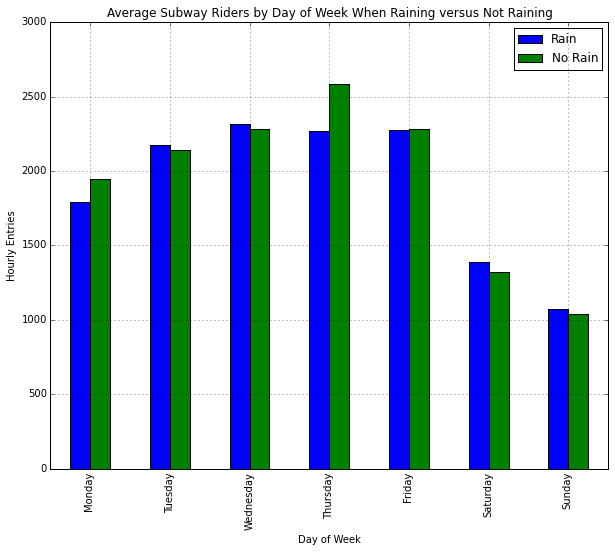

In [15]:
plot_2 = pivot_4['ENTRIESn_hourly'].plot(kind='bar')
plot_2.set_title('Average Subway Riders by Day of Week When Raining versus Not Raining')
plot_2.set_ylabel('Hourly Entries')
plot_2.set_xlabel('Day of Week')
plot_2.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plot_2.legend(['Rain','No Rain'])

<h3>Plot Showing Average Subyway Riders Throughout the Day Split by Day of Week</h3>

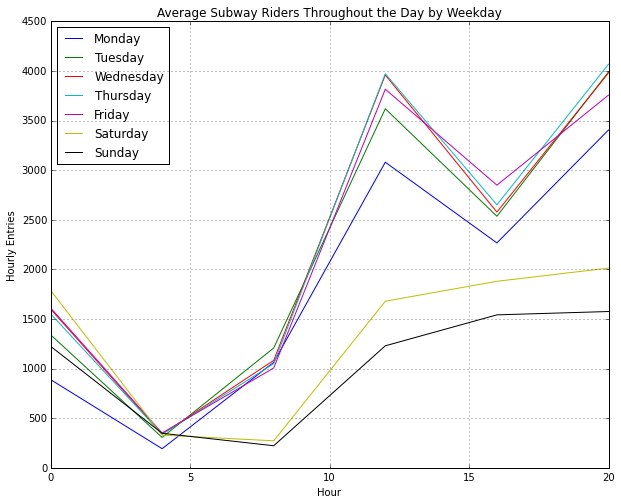

In [16]:
plot_1 = pivot_1['ENTRIESn_hourly'].plot(title='Average Subway Riders Throughout the Day by Weekday')
plot_1.set_ylabel('Hourly Entries')
plot_1.set_xlabel('Hour')
plot_1.legend(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],loc='upper left')

<p><font color=tomato>This graph shows the number or subway riders throughout the day broken down by day of the week. It shows that the number of riders declines in the early morning and increases throughout the day. This chart also shows that the overall number or riders is less during weekends than during the week.<br>I used the pandas <a href='http://pandas.pydata.org/pandas-docs/stable/reshaping.html'>pivot table</a> function coupled with <a href='http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html'>numpy.mean</a> to produce the pivot table this plot was created from</font></p>

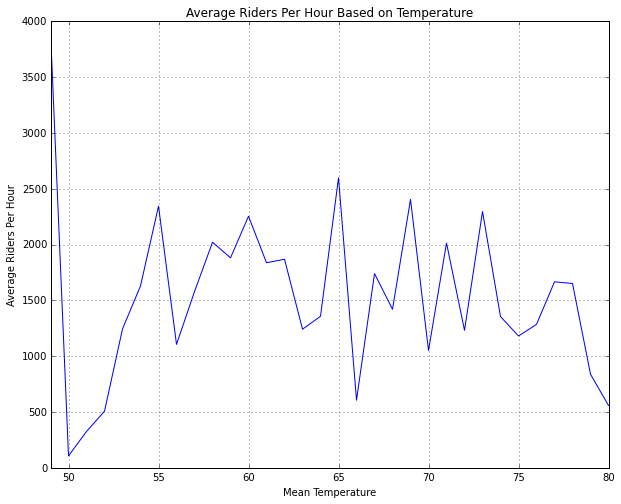

In [17]:
plot_3 = pivot_2['ENTRIESn_hourly'].plot()
plot_3.set_ylabel('Average Riders Per Hour')
plot_3.set_xlabel('Mean Temperature')
plot_3.set_title('Average Riders Per Hour Based on Temperature')

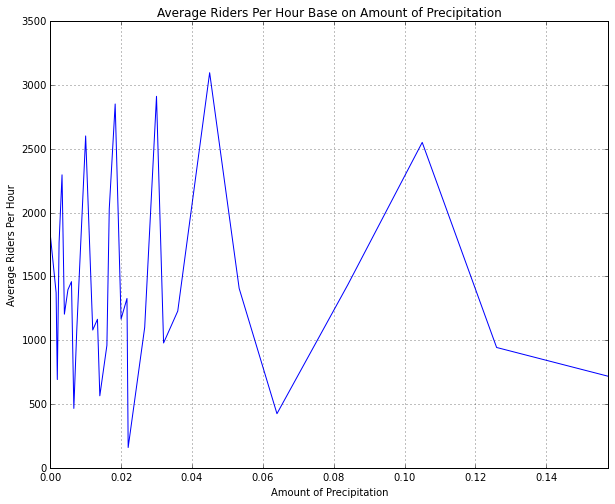

In [18]:
plot_4 = pivot_3['ENTRIESn_hourly'].plot()
plot_4.set_title('Average Riders Per Hour Base on Amount of Precipitation')
plot_4.set_ylabel('Average Riders Per Hour')
plot_4.set_xlabel('Amount of Precipitation')

In [19]:
#Seperate Data by Weekday/Weekend and by each day of the week
weekdays = improved_dataset[improved_dataset['day_week']<=4]
weekends = improved_dataset[improved_dataset['day_week']>4]
monday = improved_dataset[improved_dataset['day_week']==0]
tuesday = improved_dataset[improved_dataset['day_week']==1]
wednesday = improved_dataset[improved_dataset['day_week']==2]
thursday = improved_dataset[improved_dataset['day_week']==3]
friday = improved_dataset[improved_dataset['day_week']==4]
saturday = improved_dataset[improved_dataset['day_week']==5]
sunday = improved_dataset[improved_dataset['day_week']==6]

In [37]:
#Run Mann-Whitney U Comparing Weekdays to Weeken
print 'Mann-Whitney U Test Output ',mann_whitney_u_week_weekend
print 'U value : ',mann_whitney_u_week_weekend[0]
print 'One-Tailed p-value : ',mann_whitney_u_week_weekend[1]
print 'Two-Tailed p-value : ',(mann_whitney_u_week_weekend[1]*2)
print 'Mean ENTRIESn_hourly on Weekends : ',(weekends['ENTRIESn_hourly'].mean())
print 'Mean ENTRIESn_hourly on Weekdays : ',(weekdays['ENTRIESn_hourly'].mean())

DescribeResult(nobs=30470, minmax=(0.0, 32814.0), mean=2158.0427305546441, variance=10774939.423097735, skewness=3.716842161584894, kurtosis=19.18144553673818)
DescribeResult(nobs=12179, minmax=(0.0, 26753.0), mean=1207.4565235240989, variance=2921715.0218204306, skewness=3.6383815465432074, kurtosis=20.726320966998294)
DescribeResult(nobs=42649, minmax=(0.0, 32814.0), mean=1886.5899552158317, variance=8716580.6414166372, skewness=4.025747813992016, kurtosis=23.20878066029205)
Mann-Whitney U Test Output  (149803470.0, 5.7803894056584393e-213)
U value :  149803470.0
One-Tailed p-value :  5.78038940566e-213
Two-Tailed p-value :  1.15607788113e-212
Mean ENTRIESn_hourly on Weekends :  1207.45652352
Mean ENTRIESn_hourly on Weekdays :  2158.04273055


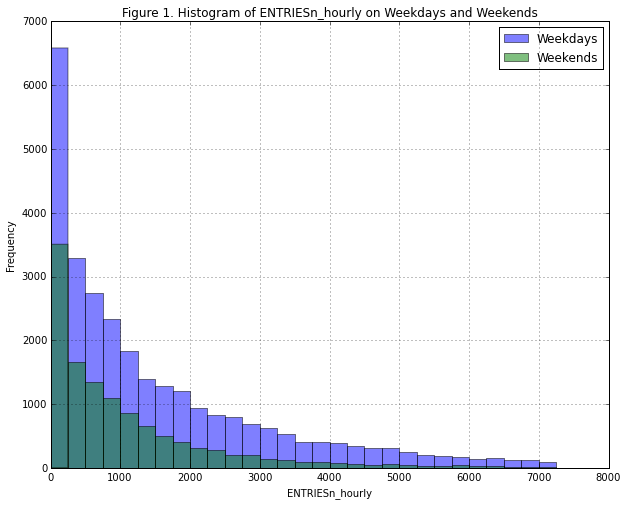

In [40]:
binLabels = []
for x in range(30):
    binLabels.append(x*250)
plt.figure()
plt.title('Figure 1. Histogram of ENTRIESn_hourly on Weekdays and Weekends')
plt.xlabel('ENTRIESn_hourly')
plt.ylabel('Frequency')
weekdays['ENTRIESn_hourly'].hist(bins=binLabels, alpha=0.5,label=['Weekdays'])
weekends['ENTRIESn_hourly'].hist(bins=binLabels,alpha=0.5,label=['Weekends'])
plt.legend(['Weekdays','Weekends'])

<h3>Linear Regression and R-Squared Functions</h3>
<h4>These are from completed problems on Udacity Problem set 3</h4>

In [22]:
# From Udacity PS3.5
def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    
    This can be the same code as in the lesson #3 exercise.
    """
    
    lr = linear_model.LinearRegression(fit_intercept=True)
    lr.fit(features,values)
    intercept = lr.intercept_
    params = lr.coef_
    return intercept, params
    

def predictions(dataframe,features):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~10%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this exercise on your own computer, locally. If you do, you may want to complete Exercise
    8 using gradient descent, or limit your number of features to 10 or so, since ordinary
    least squares can be very slow for a large number of features.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a
    smaller number of features.
    
    Features is a dataframe slice containing variables of interest i.e.
    dataframe[['rain', 'meantempi']]
    '''

    # Add UNIT to features using dummy variables
    dummy_units = pd.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    
    # Get the numpy arrays
    features_array = features.values
    values_array = values.values

    # Perform linear regression
    intercept, params = linear_regression(features_array, values_array)
    
    predictions = intercept + np.dot(features_array, params)
    return predictions

In [23]:
def compute_r_squared(data, predictions):
    '''
    In exercise 5, we calculated the R^2 value for you. But why don't you try and
    and calculate the R^2 value yourself.
    
    Given a list of original data points, and also a list of predicted data points,
    write a function that will compute and return the coefficient of determination (R^2)
    for this data.  numpy.mean() and numpy.sum() might both be useful here, but
    not necessary.

    Documentation about numpy.mean() and numpy.sum() below:
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html
    http://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html
    '''
    def square(x):
        return x**2
    squareArray = np.vectorize(square)
    dataAverage = np.mean(data)
    
    ssRes = np.sum(squareArray(data-predictions))
    
    ssTot = np.sum(squareArray(data-dataAverage))
    
    r_squared=1-(ssRes/ssTot)

    return r_squared

<h3>Prediction based on rain and meantemp </h3>
<p>Uses linear regression with gradient descent from sklearn.</p>

In [26]:
def normalize_features(features):
    ''' 
    Returns the means and standard deviations of the given features, along with a normalized feature
    matrix.
    ''' 
    means = np.mean(features, axis=0)
    std_devs = np.std(features, axis=0)
    normalized_features = (features - means) / std_devs
    return means, std_devs, normalized_features

def recover_params(means, std_devs, norm_intercept, norm_params):
    ''' 
    Recovers the weights for a linear model given parameters that were fitted using
    normalized features. Takes the means and standard deviations of the original
    features, along with the intercept and parameters computed using the normalized
    features, and returns the intercept and parameters that correspond to the original
    features.
    ''' 
    intercept = norm_intercept - np.sum(means * norm_params / std_devs)
    params = norm_params / std_devs
    return intercept, params

def linear_regression_gd(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    """
    lr = linear_model.SGDRegressor(n_iter=10)
    lr.fit(features,values)
    intercept = lr.intercept_
    params = lr.coef_
    
    return intercept, params
    


def predictions_gd(dataframe,features):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with gradient descent.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~50%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this exercise on your own computer, locally.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a
    smaller number of features or fewer iterations.
    '''    
    # Add UNIT to features using dummy variables
    dummy_units = pd.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']
    
    # Get the numpy arrays
    features_array = features.values
    values_array = values.values
    
    means, std_devs, normalized_features_array = normalize_features(features_array)

    # Perform gradient descent
    norm_intercept, norm_params = linear_regression_gd(normalized_features_array, values_array)
    
    intercept, params = recover_params(means, std_devs, norm_intercept, norm_params)
    
    predictions = intercept + np.dot(features_array, params)
    # The following line would be equivalent:
    # predictions = norm_intercept + np.dot(normalized_features_array, norm_params)
    
    return predictions

<h3>Linear Regression Runs with R-Squared Values</h3>

In [46]:
#Run Linear Regression functions and calculate R-Squared values comparing predicted ENTRIESn_hourly to actual
features_1 = improved_dataset[['rain']]
features_2 = improved_dataset[['rain', 'precipi','meantempi','fog','weekday']]
predictions_out_1 = predictions(improved_dataset,features_1)
predictions_out_2 = predictions(improved_dataset,features_2)
predictions_out_1_gd = predictions_gd(improved_dataset,features_1)
predictions_out_2_gd = predictions_gd(improved_dataset,features_2)
prediction_1_r_squared = compute_r_squared(improved_dataset['ENTRIESn_hourly'],predictions_out_1)
prediction_2_r_squared = compute_r_squared(improved_dataset['ENTRIESn_hourly'],predictions_out_2)
prediction_1_r_squared_gd = compute_r_squared(improved_dataset['ENTRIESn_hourly'],predictions_out_1_gd)
prediction_2_r_squared_gd = compute_r_squared(improved_dataset['ENTRIESn_hourly'],predictions_out_2_gd)
print 'Linear regression using only rain\n'
print 'R-Squared : ',prediction_1_r_squared
print 'R-Squared with Gradient Descent : ',prediction_1_r_squared_gd
print 'Linear regression using multiple variables\n'
print 'R-Squared : ',prediction_2_r_squared
print 'R-Squared with Gradient Descent : ',prediction_2_r_squared_gd

Linear regression using only rain

R-Squared :  0.375820464297
R-Squared with Gradient Descent :  0.370503151513
Linear regression using multiple variables

R-Squared :  0.401155466011
R-Squared with Gradient Descent :  0.388821108975


<h3>Histograms of Differenec Between Predicted and Actual ENTRIESn_hourly</h3>

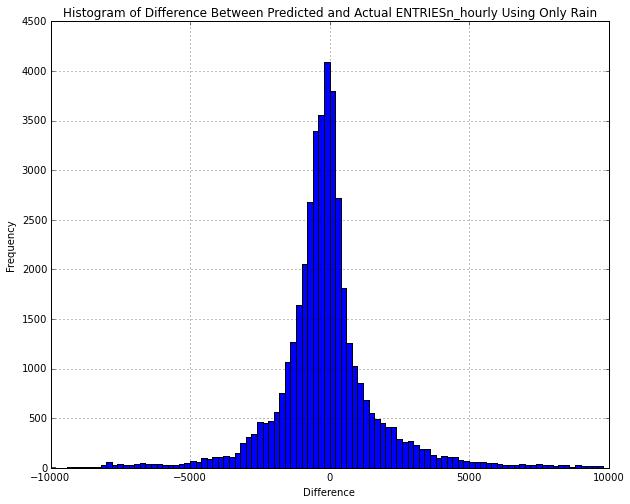

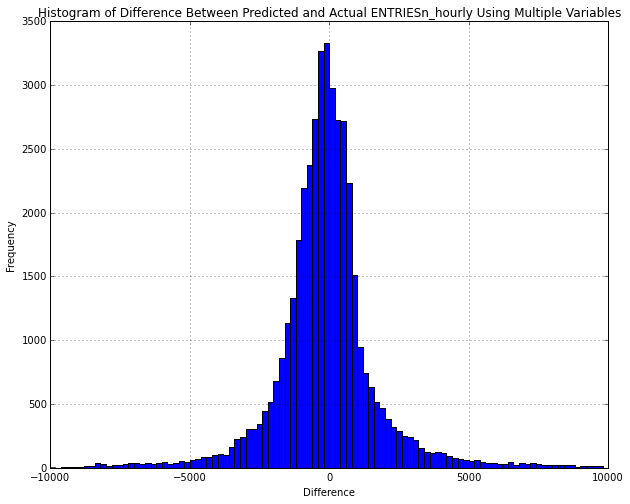

In [47]:
binLabels = []
for x in range(-50,50):
    binLabels.append(x*200)
plt.figure()
plt.title('Histogram of Difference Between Predicted and Actual ENTRIESn_hourly Using Only Rain')
plt.xlabel('Difference in ENTRIESn_hourly')
plt.ylabel('Frequency')
(improved_dataset['ENTRIESn_hourly'] - predictions_out_1).hist(bins = binLabels)
plt.figure()
plt.title('Histogram of Difference Between Predicted and Actual ENTRIESn_hourly Using Multiple Variables')
plt.xlabel('Difference in ENTRIESn_hourly')
plt.ylabel('Frequency')
(improved_dataset['ENTRIESn_hourly'] - predictions_out_2).hist(bins = binLabels)

<h3>Kruskall Wallis Test</h3>
<p> The below output shows the output for the scipy <a href='http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.mstats.kruskalwallis.html'>Kruskall Wallace</a> test which is testing for a significant difference of riders between all days of the week. The output is the H-statistic and the p-value.

In [21]:
kruskallwallis_days_of_week=scipy.stats.mstats.kruskalwallis(monday['ENTRIESn_hourly'],tuesday['ENTRIESn_hourly'],wednesday['ENTRIESn_hourly'],thursday['ENTRIESn_hourly'],friday['ENTRIESn_hourly'],saturday['ENTRIESn_hourly'],sunday['ENTRIESn_hourly'])
print kruskallwallis_days_of_week

(1196.9710541566496, 2.1655424886355357e-255)
